# Final Evaluation of the models

In [1]:
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

import matplotlib.pyplot as plt
import tensorflow.keras as keras

import sys
sys.path.insert(0, "../Src/")
import loadData
import visualization as viz

%autosave 5

Autosaving every 5 seconds


Autosaving every 5 seconds


In [2]:
_, test = loadData.loadData('MSFT')
date = test['ds']
validation = test['y']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Autoregression

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


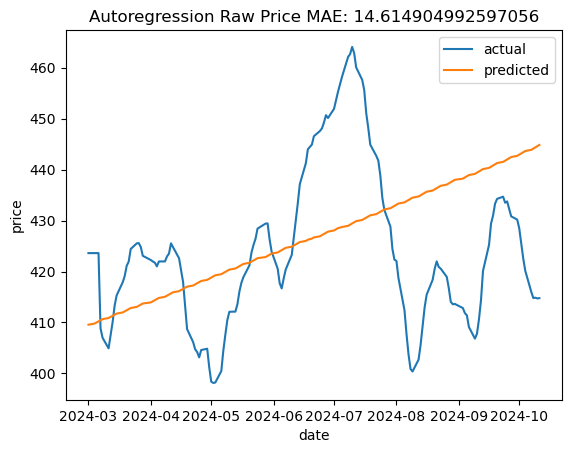

Autoregression Raw Price MAE: 14.614904992597056


<Figure size 640x480 with 0 Axes>

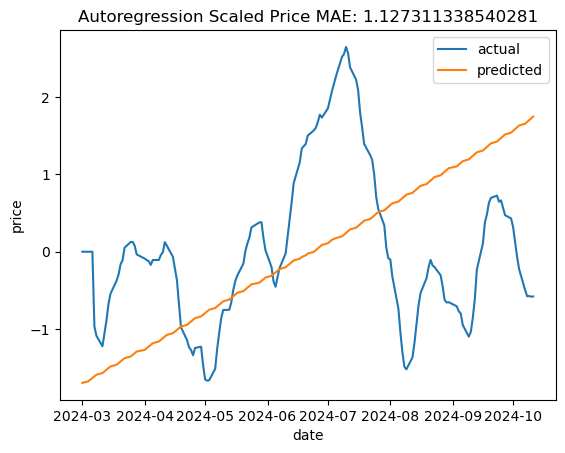

Autoregression Scaled Price MAE: 1.127311338540281


<Figure size 640x480 with 0 Axes>

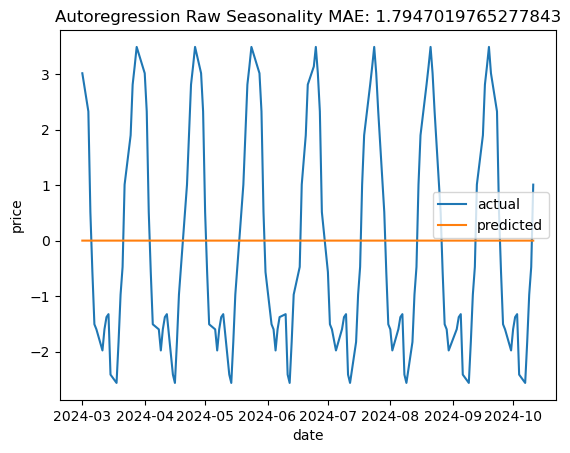

Autoregression Raw Seasonality MAE: 1.7947019765277843


<Figure size 640x480 with 0 Axes>

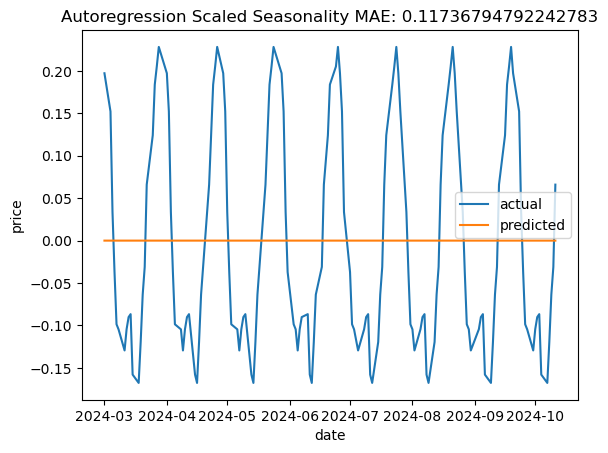

Autoregression Scaled Seasonality MAE: 0.11736794792242783


<Figure size 640x480 with 0 Axes>

In [3]:
viz.compareSimplePickleModel('autoRegression',date,validation, 'Autoregression')

## ARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


/Users/garysimmons/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


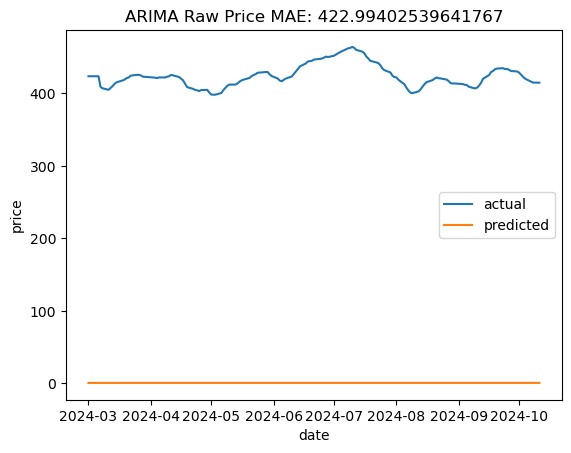

ARIMA Raw Price MAE: 422.99402539641767


<Figure size 640x480 with 0 Axes>

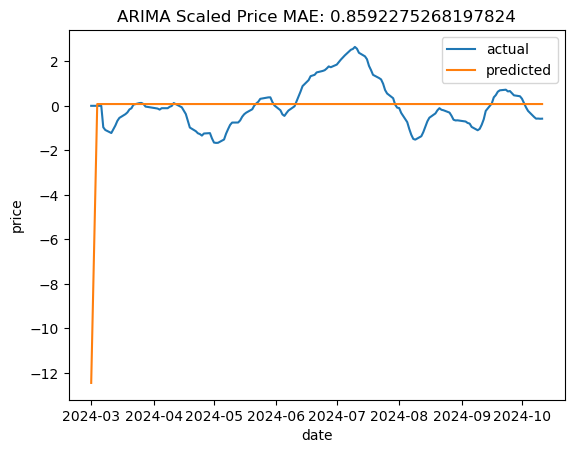

ARIMA Scaled Price MAE: 0.8592275268197824


<Figure size 640x480 with 0 Axes>

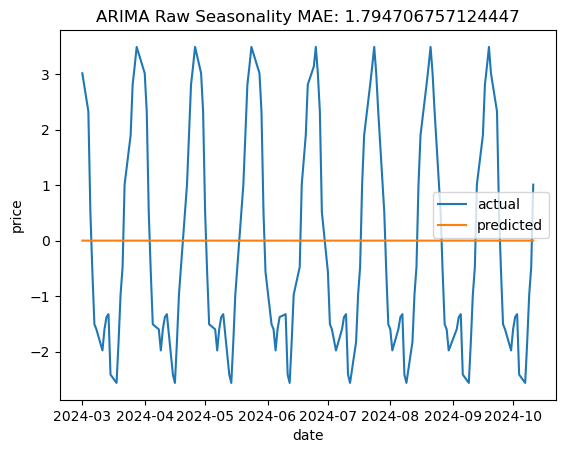

ARIMA Raw Seasonality MAE: 1.794706757124447


<Figure size 640x480 with 0 Axes>

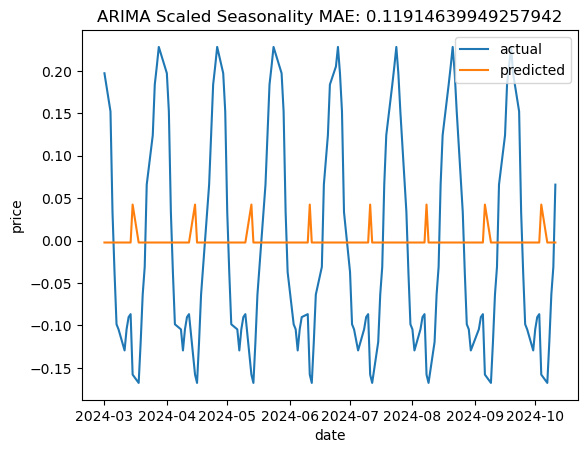

ARIMA Scaled Seasonality MAE: 0.11914639949257942


<Figure size 640x480 with 0 Axes>

In [4]:
viz.compareSimplePickleModel('arima',date, validation, 'ARIMA')

## SARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


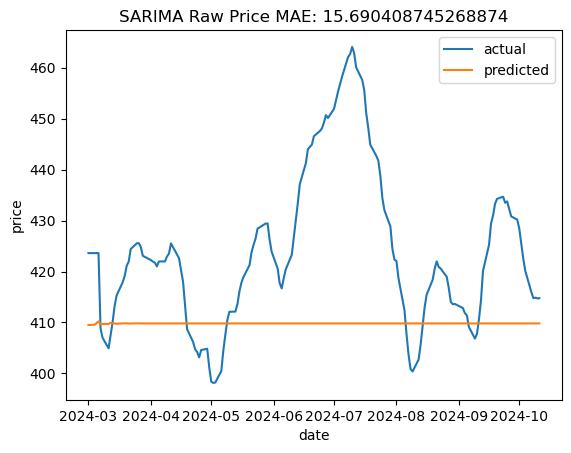

SARIMA Raw Price MAE: 15.690408745268874


<Figure size 640x480 with 0 Axes>

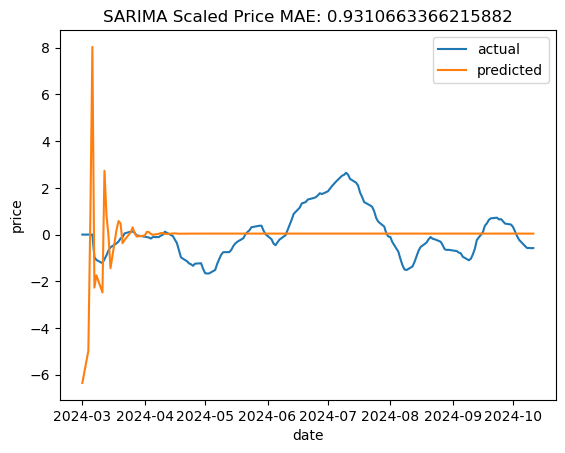

SARIMA Scaled Price MAE: 0.9310663366215882


<Figure size 640x480 with 0 Axes>

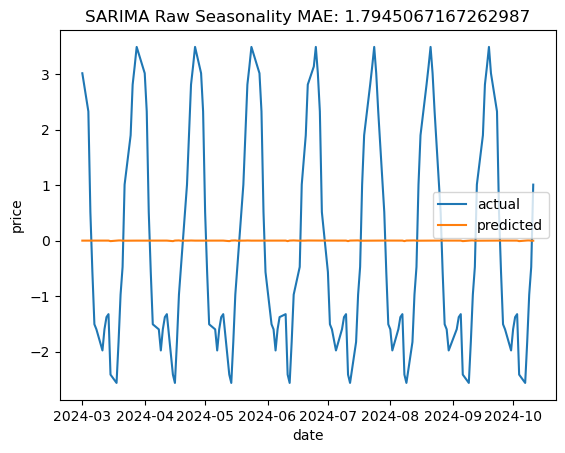

SARIMA Raw Seasonality MAE: 1.7945067167262987


<Figure size 640x480 with 0 Axes>

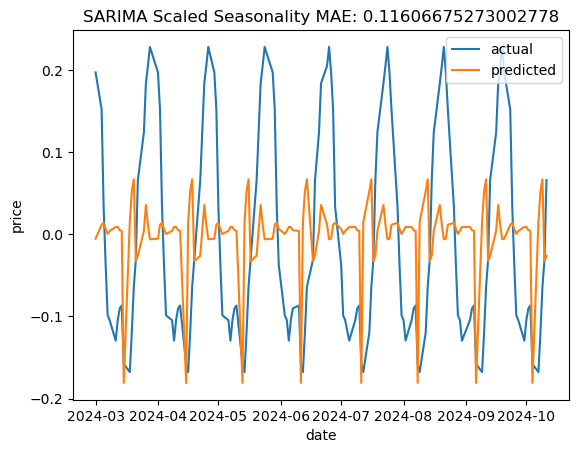

SARIMA Scaled Seasonality MAE: 0.11606675273002778


<Figure size 640x480 with 0 Axes>

In [5]:
viz.compareSimplePickleModel('sarima',date,validation, 'SARIMA')

## ExponentialSmoothing

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


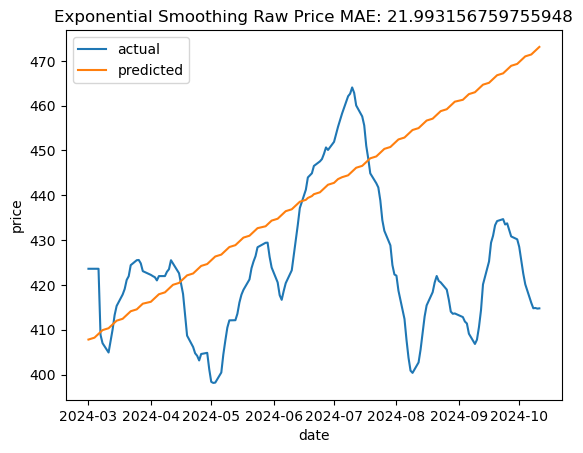

Exponential Smoothing Raw Price MAE: 21.993156759755948


<Figure size 640x480 with 0 Axes>

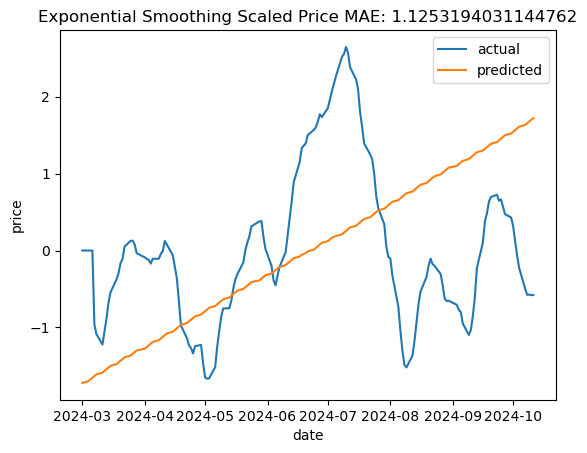

Exponential Smoothing Scaled Price MAE: 1.1253194031144762


<Figure size 640x480 with 0 Axes>

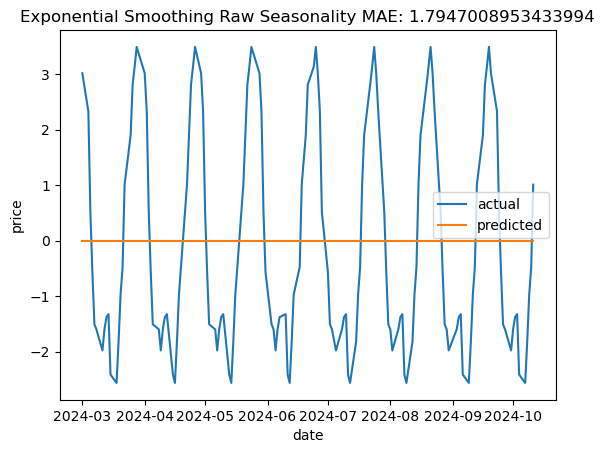

Exponential Smoothing Raw Seasonality MAE: 1.7947008953433994


<Figure size 640x480 with 0 Axes>

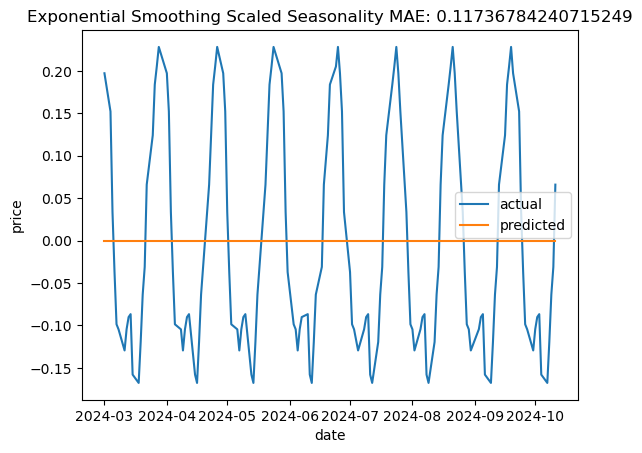

Exponential Smoothing Scaled Seasonality MAE: 0.11736784240715249


<Figure size 640x480 with 0 Axes>

In [6]:
viz.compareSimplePickleModel('ExponentialSmoothing',date,validation, 'Exponential Smoothing')

## Prophet

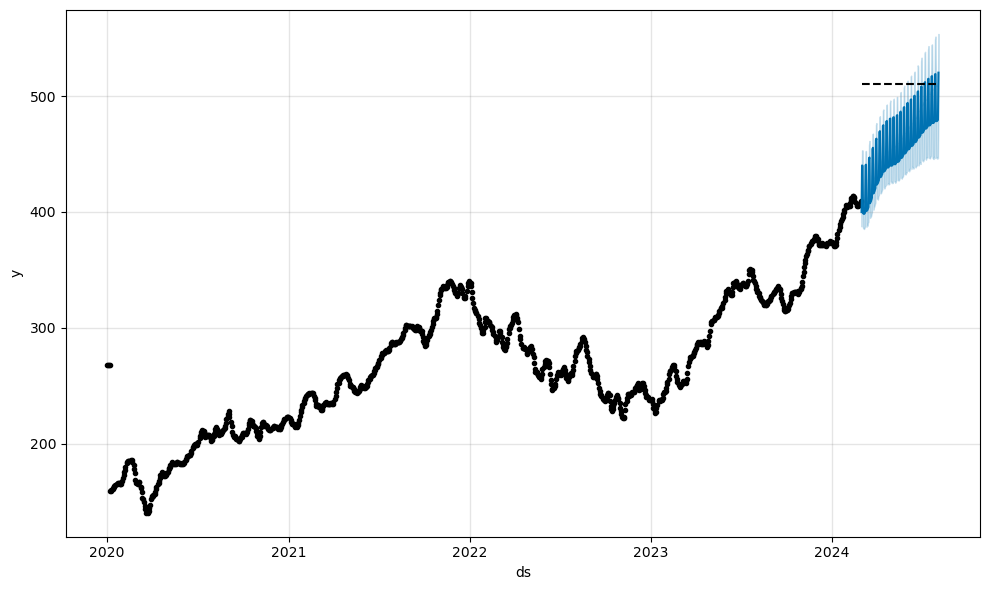

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


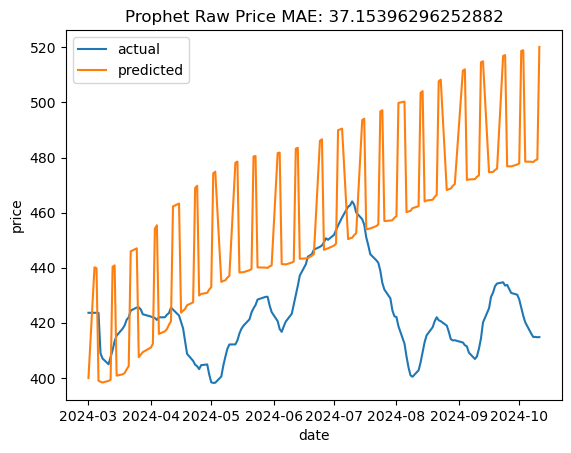

Prophet Raw Price MAE: 37.15396296252882


<Figure size 640x480 with 0 Axes>

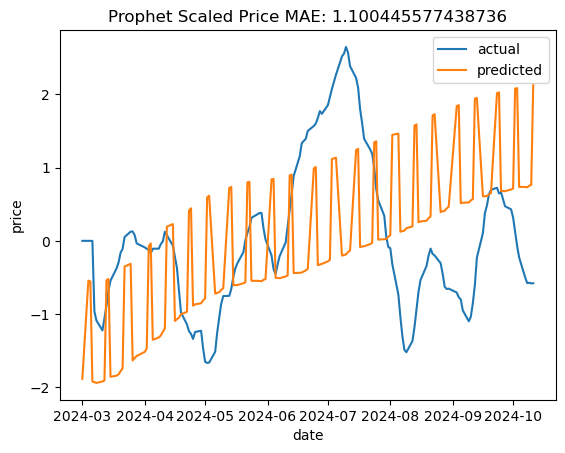

Prophet Scaled Price MAE: 1.100445577438736


<Figure size 640x480 with 0 Axes>

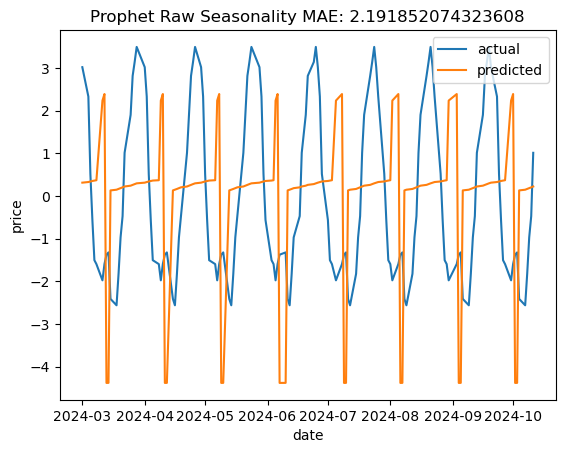

Prophet Raw Seasonality MAE: 2.191852074323608


<Figure size 640x480 with 0 Axes>

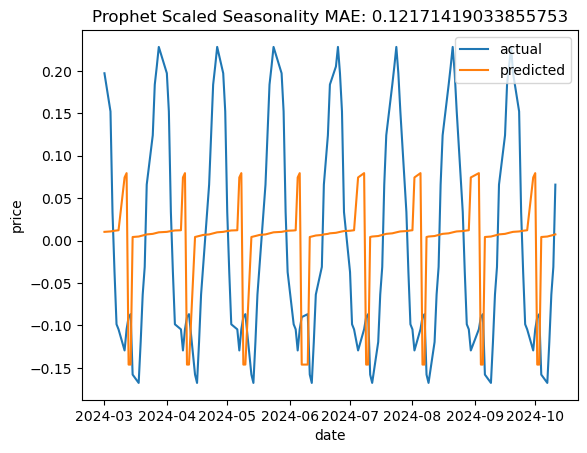

Prophet Scaled Seasonality MAE: 0.12171419033855753


<Figure size 640x480 with 0 Axes>

In [7]:
model = viz.loadModel('prophet')
future = model.make_future_dataframe(periods=test.shape[0], freq='D',include_history=False)
capValue = test['y'].max() * 1.1
future['cap'] = capValue
future['floor'] = 0
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
viz.compare(date,validation,forecast['yhat'],'Prophet')

## LSTM

2024-12-08 18:42:24.641254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-08 18:42:24.642107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-08 18:42:24.642580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 1s 4ms/step
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


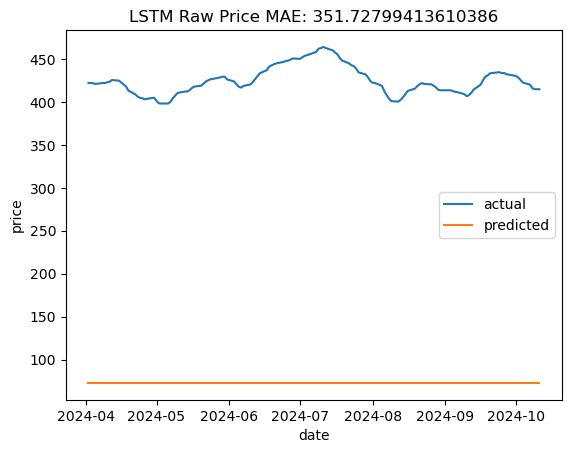

LSTM Raw Price MAE: 351.72799413610386


<Figure size 640x480 with 0 Axes>

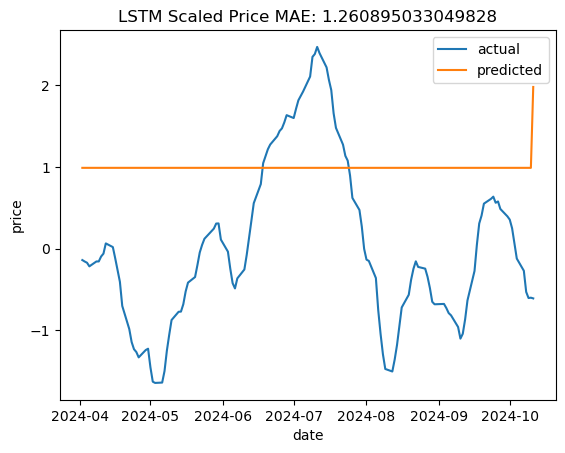

LSTM Scaled Price MAE: 1.260895033049828


<Figure size 640x480 with 0 Axes>

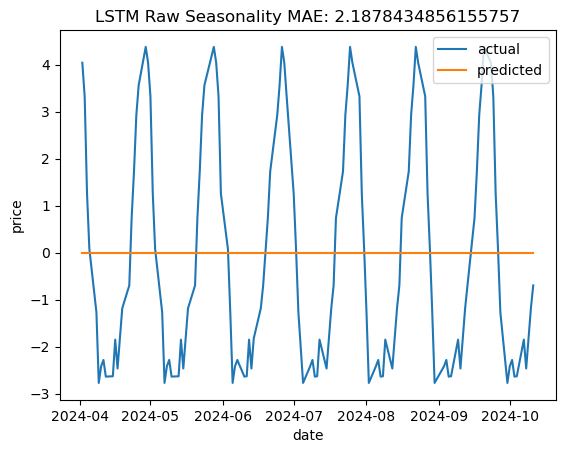

LSTM Raw Seasonality MAE: 2.1878434856155757


<Figure size 640x480 with 0 Axes>

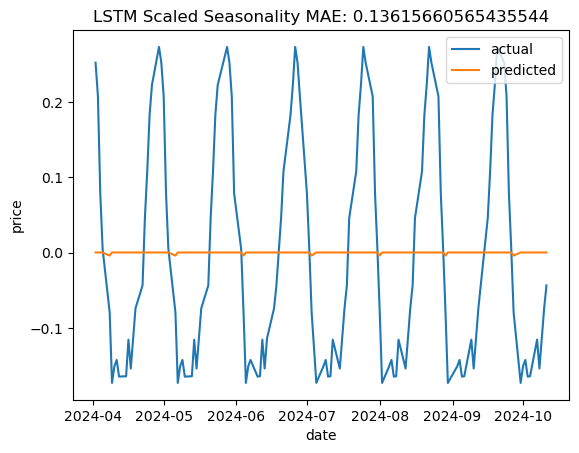

LSTM Scaled Seasonality MAE: 0.13615660565435544


<Figure size 640x480 with 0 Axes>

In [8]:
model = keras.models.load_model('../Models/LSTM_.h5')
XTest, yTest = loadData.processDataForLSTM(test['y'])
yPredict = model.predict(XTest)
viz.compare(date[-len(yTest):],yTest, yPredict ,'LSTM')